# Tutorial


### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.

Importing in the necessary libraries 

In [2]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report



In [3]:
df = pd.read_csv('datasets/data.csv')
df.shape

#There are 6819 rows and 96 columns


(6819, 96)

In [5]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Pre-Processing Data

In [5]:
#Check for any missing values, and if the count of values in every column tally
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# Split data into features (x) and target varaible (y)

y = df['Bankrupt?']                             
x = df.drop(columns=['Bankrupt?'])

# Split the dataset into training and test sets to evaluate model's performance 
# We chose test size 0.3 beacuse 30% of the data allocated for testing and 70% for training.
# This avoids over-fitting as a small test set relies on  too few examples, increasing the chances of overfitting.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Feature scaling (Standardisation): Initialize the scaler
scaler = StandardScaler() 

# Computes mean and stdev of training data, & scales it accordingly
x_trained_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_scaled= scaler.transform(x_test)

Simple (Binary) Logistic Regression Model
* Since our y target is binomial, we use the simple logistic regression model

In [7]:
# A small regularization strength is used to prevent model from overfitting (by adding a penalty to large coefficients)
# Penalty refers to L2 Regularization (Adds sum of squared coefficients to loss function)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C=1/REG_CONST is the inverse of regularization strength
# Lower C = 1/0.01 = 100 means a weaker regularization is used (Allows for more flexibility)
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_trained_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean() #Proportions of correct predictions 
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.964


Proportion of correct predicitons made by model using the test data = 0.963, which is a good accuracy score. 

## ROC Curve and Confusiuon Matrix

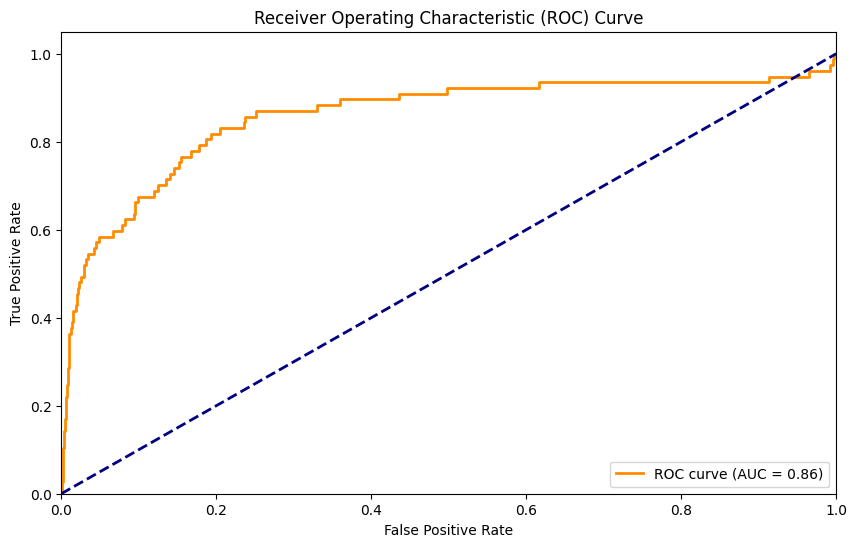

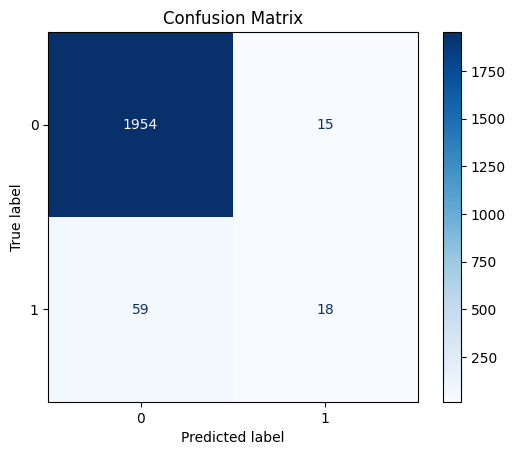

AUC Score: 0.858
F1 Score: 0.327

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1969
           1       0.55      0.23      0.33        77

    accuracy                           0.96      2046
   macro avg       0.76      0.61      0.65      2046
weighted avg       0.95      0.96      0.96      2046



In [8]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC Score = 0.865
* Measures model abiility to distinguish between positive and negative classes across all possible classification thresholds, 
1.0 being the perfect distinction between classes
* A high AUC score means the model is quite effective, and has good discriminative power to distinguish between classes.

F1 Score = 0.227
* Model is struggling to balance precision and recall metrics
* Especially true for positive class. This could be due to the fewer instances of companies that went bankrupt (1) in the given dataset 

From classification report:

Class 0 
* Precision = 0.98, Recall = 0.99, F1-Score = 0.98. 
* Model is precise in predicting negative classes, good at identifying most of true negative instances as negative. Balance is high.

Class 1 
* Precision = 0.31, Recall = 0.18, F1-Score = 0.23. 
* Model is poor in predicting positive class, and poor in identifying true positive instances correctly (only 18% correct). Labels 82% of true positive instances as false negatives. 

Key takeaway from this model: Significant class imbalance. 


## Decision Tree (with Class Weights)

From the confusion matrix, we have discovered that the data has high class imbalance. To combat this, we shall use another model: Weighted Decision Tree.

### Finding the Optimal Depth for our Decision Tree

Depth = 1, train_acc = 0.9673, eval_acc = 0.9648
Depth = 2, train_acc = 0.9713, eval_acc = 0.9658
Depth = 3, train_acc = 0.9736, eval_acc = 0.9668
Depth = 4, train_acc = 0.9742, eval_acc = 0.9658
Depth = 5, train_acc = 0.9799, eval_acc = 0.9550
Depth = 6, train_acc = 0.9853, eval_acc = 0.9531
Depth = 7, train_acc = 0.9908, eval_acc = 0.9521
Depth = 8, train_acc = 0.9941, eval_acc = 0.9501


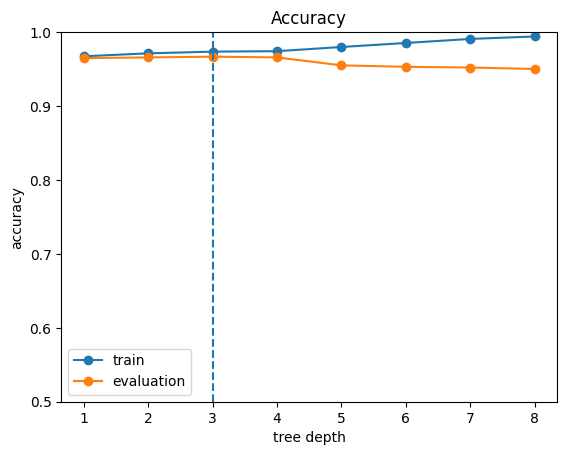

In [14]:
# Separate the data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()


Optimal depth = 3, test_acc = 0.8759


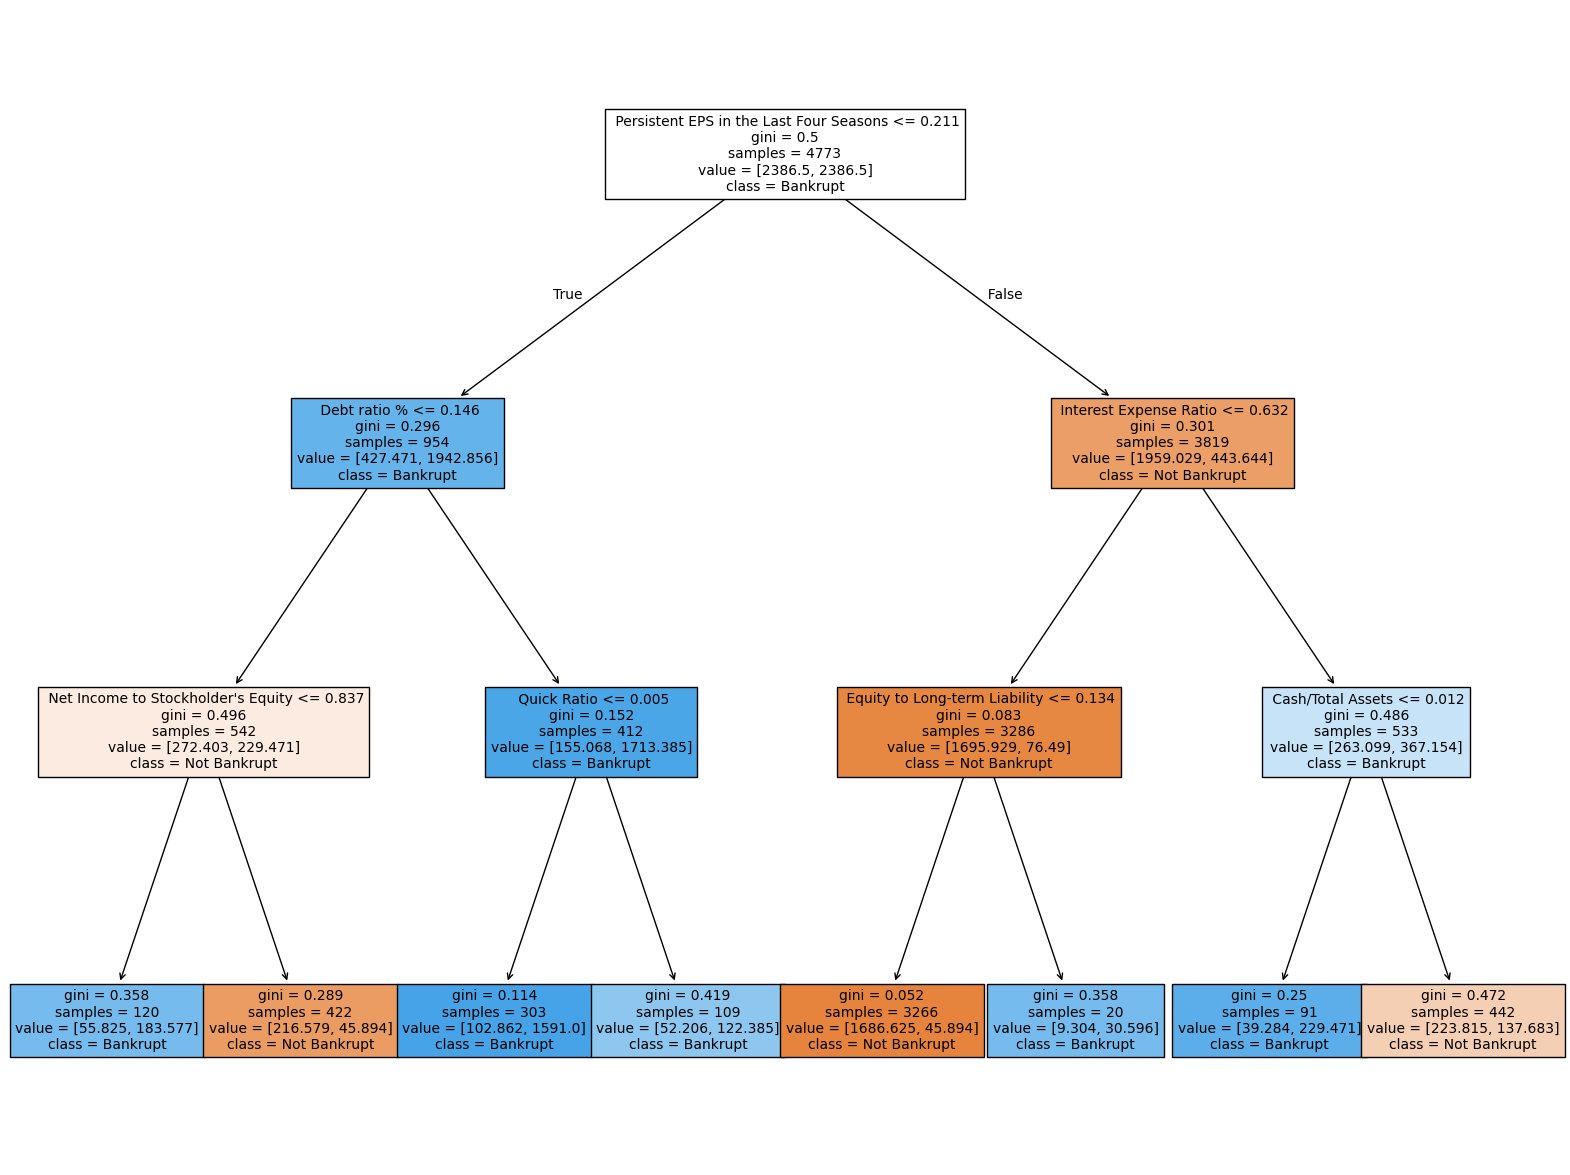

In [22]:
# Set max_depth as 3 as it has the highest accuracy of validation data.
# Use a balanced class weight to solve high class imbalance in data. 
model = DecisionTreeClassifier(max_depth=3,
                               random_state=42,
                               class_weight='balanced')
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(20,15))
tree.plot_tree(model, 
               feature_names = feat_names, 
               class_names=['Not Bankrupt', 'Bankrupt'],
               filled=True, #Blue represents Not Bankrupt  #Orange represents Bankrupt 
               fontsize=10)
plt.show()

## Feature Importance
Side quest to find out which variables affect the chance of a company turning bankrupt or not!

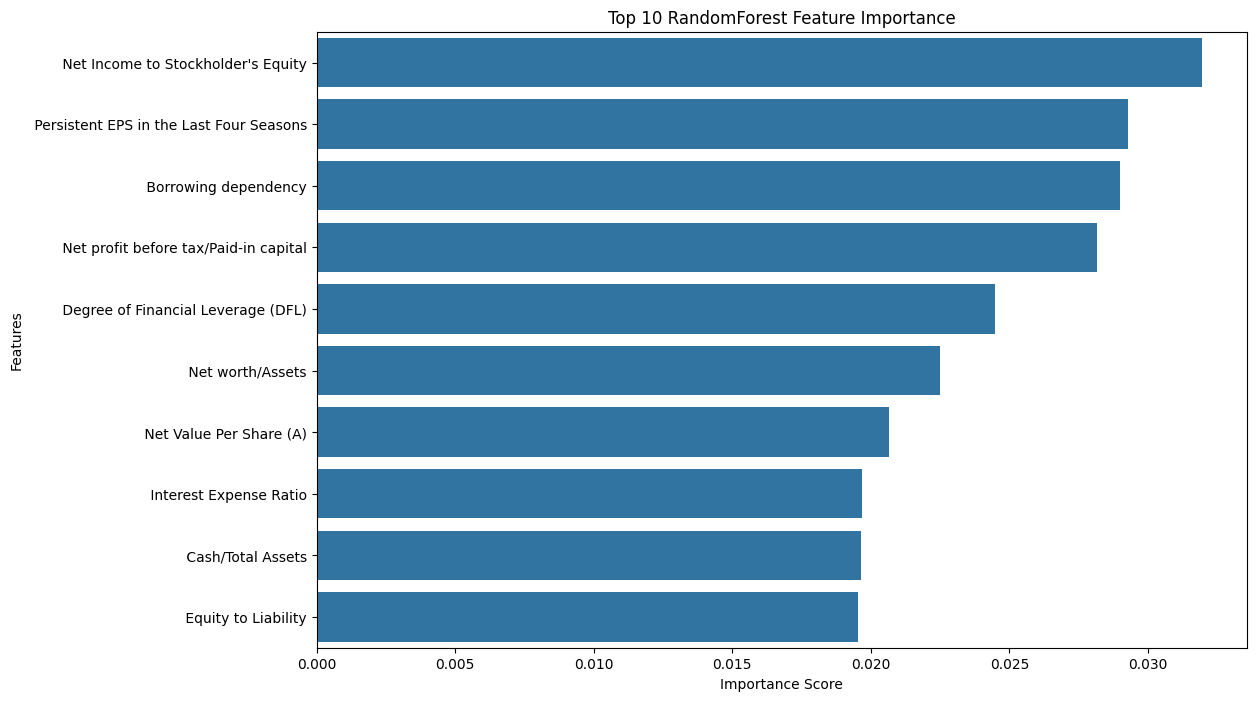

In [11]:
# Separate features and target variable
target_column = 'Bankrupt?'  # Target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

# Feature importance from RandomForest
rf_importances = rf_model.feature_importances_
rf_features = df.drop(columns=[target_column]).columns

# Get the top 10 features based on importance
top_n = 10
sorted_indices = np.argsort(rf_importances)[::-1]  # Sort indices in descending order
top_indices = sorted_indices[:top_n]  # Get indices of the top 10 features

top_importances = rf_importances[top_indices]
top_features = rf_features[top_indices]

# Plot the top 10 RandomForest feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importances, y=top_features)
plt.title(f'Top {top_n} RandomForest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()